In [1]:
import pandas as pd
class Signs:
    """
    Class to store MNIST data
    """
    def __init__(self, location):

        import pickle, gzip, collections

        # load data from file 
        #data = pd.read_csv(location, 'rb',engine='python',index_col=0)
        #X = data.drop(['label'], axis=0, inplace=True)
        #y = data["label"].values
        data = pd.read_csv("data/sign_mnist_train.csv")
        self.train_x = data.drop(columns = "label").values
        self.train_y = data["label"].values
        data = pd.read_csv("data/sign_mnist_test.csv")
        self.test_x = data.drop(columns = "label").values
        self.test_y = data["label"].values
        print("Lenght of training data is ", len(self.train_x))
        print("Lenght of testing data is ", len(self.test_x))

In [2]:
DATA_PATH = "data/sign_mnist_train.csv"
asl_data = Signs(DATA_PATH)

Lenght of training data is  27455
Lenght of testing data is  7172


In [4]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

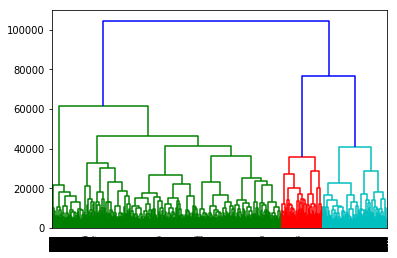

In [92]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(asl_data.train_x, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=24, affinity = 'euclidean', linkage = 'ward')


In [ ]:
import numpy as np
# save clusters for chart
y_hc = hc.fit_predict(np.reshape(asl_data.test_x, (-1, 2)))
print(y_hc)

In [95]:
from matplotlib import pyplot as plt
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')

NameError: name 'points' is not defined

In [99]:
def get_accuracy_cluster(expected, predicted):
    label_count_map = {}
    for true_label, pred_label in zip(expected, predicted):
        key = "p" + str(pred_label) + "e"  + str(true_label)
        if key in label_count_map:
            label_count_map[key] = label_count_map[key]+1
        else:
            label_count_map[key] = 1
    #print(label_count_map)
    import collections
    od = collections.OrderedDict(sorted(label_count_map.items()))
    print(od)
    final_label_map = {}
    final_label_count_map = {}
    marked = []
    for key, value in od.items():
        #print(key, value)
        pred_label = ""
        true_label = ""
        e_flag = 0
        for k in range(0, len(key)):
            if key[k] != "p" and key[k] != "e" and e_flag == 0:
               pred_label = pred_label+key[k]
            elif key[k] != "p" and key[k] != "e" and e_flag == 1:
               true_label = true_label+key[k]
            elif key[k] == "e":
                e_flag = 1
        #print("pred is ", pred_label+ ", true is " + true_label)
        
            #break
        if pred_label not in final_label_map:
            if true_label in final_label_map.values() :
                #print("final map tie is ", final_label_map)
                #print("pred is ", pred_label+ ", true is " + true_label)
                marked.append(key)
            else:
                final_label_count_map[pred_label] = value
                final_label_map[pred_label] = true_label
                if pred_label in marked:
                    marked.remove(key)
        elif final_label_count_map[pred_label] <= value:
            if true_label in final_label_map.values() :
                #print("final map tie is ", final_label_map)
                #print("pred is ", pred_label+ ", true is " + true_label)
                marked.append(key)
            else :
                final_label_count_map[pred_label] = value
                final_label_map[pred_label] = true_label
                if pred_label in marked:
                    marked.remove(key)

    print("final map is ", final_label_map)
    print("final map key  ", final_label_map.keys())
    print("pred labels not added ", marked)
    err = 0
    for true_label, pred_label in zip(expected, predicted):
        #print(pred_label)
        if str(pred_label) not in final_label_map or final_label_map[str(pred_label)] != str(true_label):
            err = err +1
    #print("Total errors ", err)  
    return 100- err*100/len(predicted)

In [102]:
acc = get_accuracy_cluster(asl_data.test_y[0:1000], y_hc[0:1000])
#print(set(asl_data.test_y))
print("labels set ", set(y_hc))
print("Accuracy of Hierachichal clustering without feature extraction is ", acc, "%")

OrderedDict([('p0e0', 2), ('p0e1', 3), ('p0e10', 3), ('p0e11', 2), ('p0e12', 3), ('p0e13', 2), ('p0e14', 1), ('p0e15', 5), ('p0e17', 1), ('p0e18', 1), ('p0e19', 2), ('p0e2', 2), ('p0e20', 1), ('p0e21', 3), ('p0e22', 2), ('p0e23', 1), ('p0e24', 1), ('p0e3', 2), ('p0e4', 4), ('p0e5', 3), ('p0e6', 3), ('p0e7', 1), ('p0e8', 2), ('p10e0', 3), ('p10e1', 2), ('p10e10', 4), ('p10e11', 1), ('p10e12', 3), ('p10e13', 1), ('p10e14', 1), ('p10e15', 3), ('p10e16', 1), ('p10e18', 1), ('p10e19', 1), ('p10e2', 2), ('p10e20', 2), ('p10e23', 1), ('p10e24', 4), ('p10e3', 1), ('p10e4', 3), ('p10e5', 3), ('p10e6', 3), ('p10e7', 2), ('p10e8', 2), ('p11e0', 1), ('p11e10', 1), ('p11e12', 2), ('p11e13', 1), ('p11e14', 1), ('p11e17', 1), ('p11e18', 1), ('p11e19', 1), ('p11e2', 1), ('p11e22', 1), ('p11e23', 1), ('p11e3', 1), ('p11e5', 1), ('p11e6', 1), ('p11e8', 1), ('p12e0', 1), ('p12e1', 2), ('p12e10', 1), ('p12e11', 1), ('p12e12', 4), ('p12e13', 1), ('p12e15', 2), ('p12e16', 1), ('p12e17', 3), ('p12e18', 1), (

In [103]:
# sklearn skimage
from skimage import feature

# Histogram of Oriented Gradients
class HOG:
	def __init__(self, orientations = 9, pixelsPerCell = (9, 9),
		cellsPerBlock = (3, 3), block_norm = 'L2-Hys'):  
		self.orientations = orientations
		self.pixelsPerCell = pixelsPerCell
		self.cellsPerBlock = cellsPerBlock
		self.block_norm = block_norm    # changing from default to L2-Hys, improved a lot

	def describe(self, image):
		# compute HOG for the image
		hist = feature.hog(image, orientations = self.orientations,
			pixels_per_cell = self.pixelsPerCell,
			cells_per_block = self.cellsPerBlock,
			block_norm = self.block_norm) 

		# return the HOG features
		return hist

In [104]:
import numpy as np # linear algebra
import cv2
import os
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score


ppc = 16
hog_images = []
hog_features = []
i = 0
hog = HOG(orientations = 3, pixelsPerCell = (2, 2),cellsPerBlock = (4, 4), block_norm = 'L2-Hys')
hist_data = []  
for x,y in zip(asl_data.train_x, asl_data.train_y):
    fname = "img{}".format(i)+".jpg"
    cv2.imwrite(fname, x.reshape(28,28))
    img = cv2.imread(fname)
    os.remove(fname)
    gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #fd,hog_image = hog(gray, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2')
    hist = hog.describe(gray)
    hist_data.append(hist)


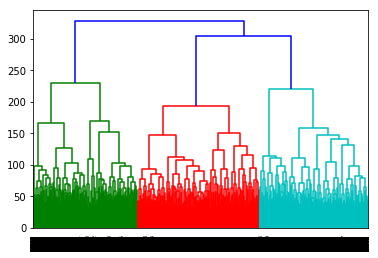

In [105]:
# create dendrogram
dendrogram_hog = sch.dendrogram(sch.linkage(hist_data, method='ward'))
# create clusters
hc_with_hog = AgglomerativeClustering(n_clusters=24, affinity = 'euclidean', linkage = 'ward')


In [106]:
hist_data_test = []  
for d in asl_data.test_x:
    fname = "img{}".format(i)+".jpg"
    cv2.imwrite(fname, d.reshape(28,28))
    img = cv2.imread(fname)
    os.remove(fname)
    gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #fd,hog_image = hog(gray, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2')
    hist = hog.describe(gray)
    hist_data_test.append(hist)

In [107]:
import numpy as np
# save clusters for chart
y_hc_hog = hc_with_hog.fit_predict(np.reshape(hist_data_test, (-1, 2)))
print(y_hc_hog)

MemoryError: 